# 🎯 Distribuição de uma Amostral

## 🎯 O que é Distribuição Amostral?

A distribuição amostral refere-se à distribuição das estatísticas (como média, variância ou proporção) obtidas a partir de múltiplas amostras retiradas de uma população.

Em outras palavras, é a distribuição de uma estatística (como a média ou proporção) obtida ao extrair várias amostras da mesma população.

Ela nos mostra como a estatística varia de uma amostra para outra. Isso é essencial para estimar parâmetros populacionais com base em amostras.

## 📝 Por que é importante?

A distribuição amostral permite:

* Inferir características da população com base em amostras.

* Estimar a variabilidade da estatística escolhida (por exemplo, a média).

* Calcular intervalos de confiança e realizar testes de hipóteses.

## 🧠 Exemplo Intuitivo

Imagine que você queira estimar a média de altura de uma população de 1.000 pessoas. Em vez de medir todos, você retira várias amostras aleatórias de 30 pessoas cada e calcula a média de cada amostra. A distribuição das médias amostrais formará a distribuição amostral da média.

## 📊 Distribuição Amostral da Média

Esta simulação ilustra o conceito de uma distribuição amostral.

Representada no gráfico superior está a população da qual faremos a amostra.

Há 33 valores diferentes na população: os inteiros de 0 a 32 (inclusive).

Você pode pensar na população como consistindo em ter um número extremamente grande de bolas com 0's, um número extremamente grande com 1's, etc. sobre eles.

A altura da distribuição mostra o número relativo de bolas de cada número. Há um número igual de bolas para cada número, então a distribuição é um retângulo.

In [ ]:
from scipy import stats
import pandas as pd

In [ ]:
dist = stats.randint(0, 33)

In [ ]:
dist.rvs()

3

In [ ]:
population = dist.rvs(10**7)

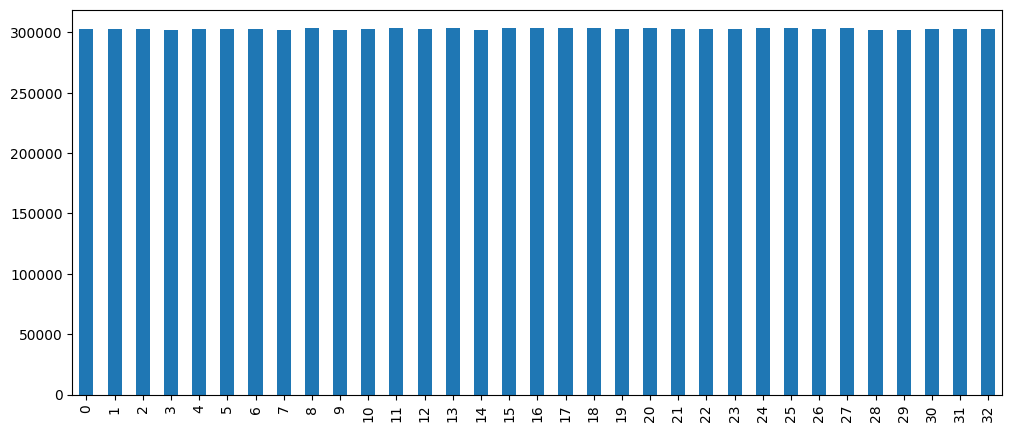

In [ ]:
pd.Series(population).value_counts().sort_index().plot.bar(figsize=(12, 5));

In [ ]:
# Calculando a média populacional
media_populacional = np.mean(population)
print(f"Média Populacional: {media_populacional:.2f}")

Média Populacional: 16.00


Se você apertar o "botão" abaixo, cinco bolas são selecionadas e plotadas no segundo gráfico. A média dessa amostra de cinco é então computada e plotada no terceiro gráfico. Se você apertar o botão novamente, outra amostra de cinco será tirada e novamente plotada no segundo gráfico.

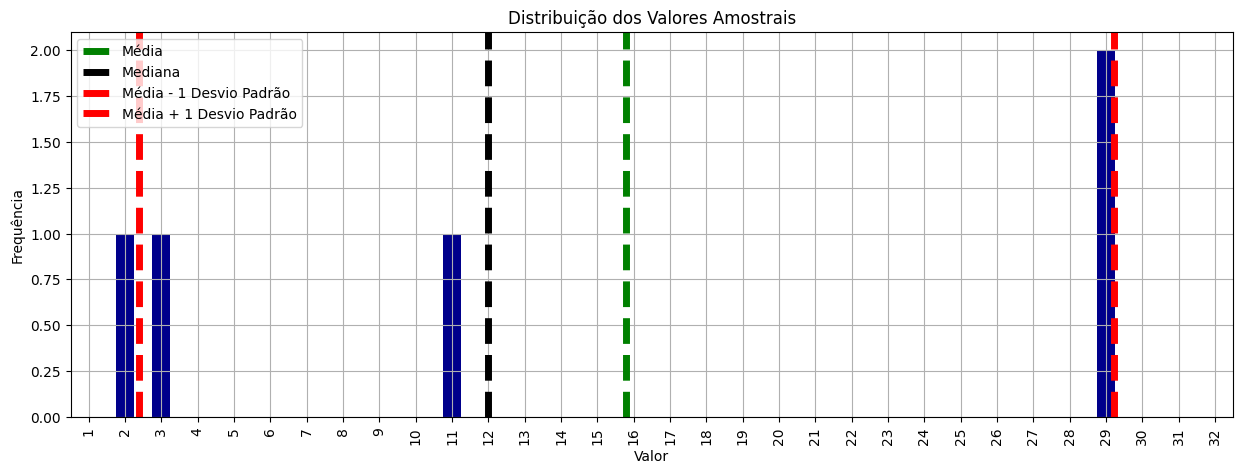

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
n = 5  # Tamanho da amostra

# Coletando uma amostra da população
amostra = np.random.choice(population, size=n, replace=False)
ser = pd.Series(amostra)

# Contando a frequência dos valores na amostra
ser_to_plot = pd.Series(np.arange(1, 33), index=range(1, 33)).apply(
    lambda x: np.count_nonzero(ser.values == x)
)

# Plotando o gráfico superior (distribuição dos valores amostrais)
fig, ax = plt.subplots(figsize=(15, 5))
ser_to_plot.plot(kind='bar', color='darkblue', ax=ax)

# Linhas de referência no gráfico
ax.axvline(x=ser.mean(), color='g', linestyle='--', linewidth=5, label='Média')
ax.axvline(x=ser.median(), color='k', linestyle='--', linewidth=5, label='Mediana')
ax.axvline(x=ser.mean() - ser.std(), color='r', linestyle='--', linewidth=5, label='Média - 1 Desvio Padrão')
ax.axvline(x=ser.mean() + ser.std(), color='r', linestyle='--', linewidth=5, label='Média + 1 Desvio Padrão')

# Ajustes e legendas
plt.title("Distribuição dos Valores Amostrais")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True)
plt.show()


- O gráfico  mostra a distribuição de frequências dos valores amostrais coletados.
- Cada barra representa o número de vezes que um valor específico apareceu na amostra.
- Linha Verde (Média): A média dos valores amostrais.
- Linha Preta (Mediana): A mediana dos valores amostrais.
- Linhas Vermelhas (Desvios Padrão): A média ± 1 desvio padrão.

In [ ]:
# Média da amostra
print(f"Média da primeira amostra: {ser.mean():.2f}")

Média da primeira amostra: 14.80


A média será computada e plotada no terceiro gráfico. Este terceiro gráfico é rotulado como "Distribuição de Médias Amostrais, N = 5" porque cada valor plotado é uma média amostral baseada em uma amostra de cinco. Neste ponto, você deve ter duas médias plotadas neste gráfico.

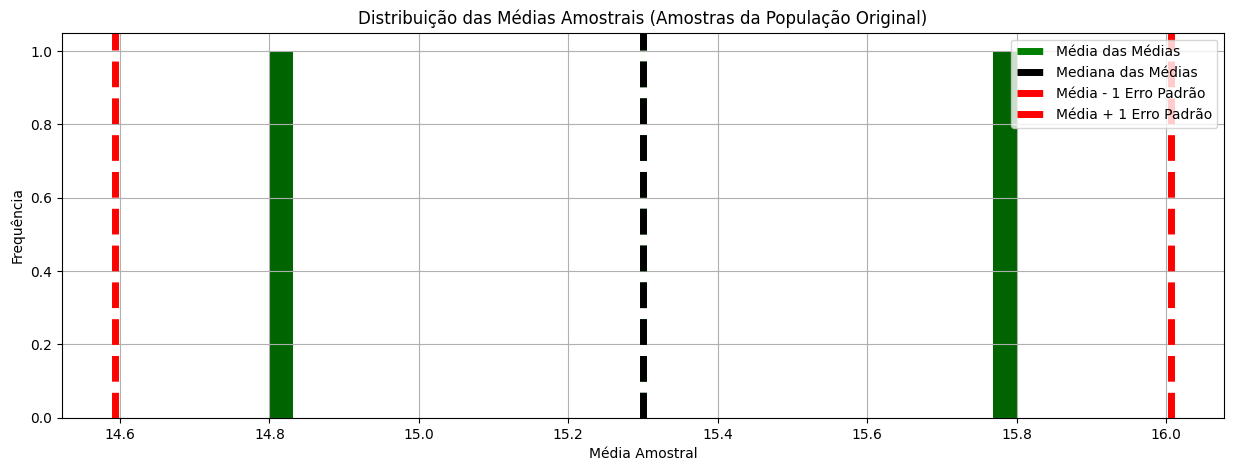

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
n = 5  # Tamanho da amostra
num_amostras = 2  # Número de amostras para coletar

# Geração da população original
population = np.random.randint(0, 33, size=10**7)

# Lista para armazenar as médias amostrais
means = []

# Coletando várias amostras e calculando suas médias
for _ in range(num_amostras):
    amostra = np.random.choice(population, size=n, replace=False)
    means.append(np.mean(amostra))

# Criando uma série com as médias
ser_means = pd.Series(means)

# Plotando o gráfico inferior (distribuição das médias amostrais)
fig, ax = plt.subplots(figsize=(15, 5))
ser_means.plot(kind='hist', bins=32, color='darkgreen', ax=ax)

# Linhas de referência no gráfico
ax.axvline(x=ser_means.mean(), color='g', linestyle='--', linewidth=5, label='Média das Médias')
ax.axvline(x=ser_means.median(), color='k', linestyle='--', linewidth=5, label='Mediana das Médias')
ax.axvline(x=ser_means.mean() - ser_means.std(), color='r', linestyle='--', linewidth=5, label='Média - 1 Erro Padrão')
ax.axvline(x=ser_means.mean() + ser_means.std(), color='r', linestyle='--', linewidth=5, label='Média + 1 Erro Padrão')

# Ajustes e legendas
plt.title("Distribuição das Médias Amostrais (Amostras da População Original)")
plt.xlabel("Média Amostral")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True)
plt.show()


A média é representada graficamente nas próprias distribuições por uma barra vertical verde. As linhas vermelhas estendem um desvio padrão em comprimento em ambas as direções.

In [ ]:
# Média da população e das amostras
print(f"Média Populacional: {np.mean(population):.2f}")
print(f"Média das Médias Amostrais: {ser_means.mean():.2f}")

Média Populacional: 16.00
Média das Médias Amostrais: 15.95


**Mas e se coletássemos mais amostras, como 1000, e repetíssemos o mesmo princípios?**

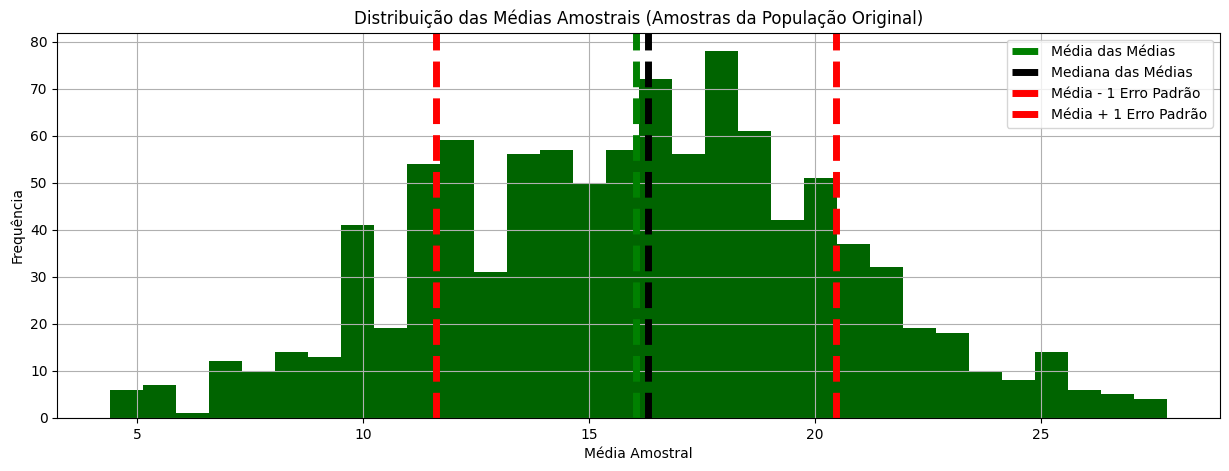

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
n = 5  # Tamanho da amostra
num_amostras = 1000  # Número de amostras para coletar

# Geração da população original
population = np.random.randint(0, 33, size=10**7)

# Lista para armazenar as médias amostrais
means = []

# Coletando várias amostras e calculando suas médias
for _ in range(num_amostras):
    amostra = np.random.choice(population, size=n, replace=False)
    means.append(np.mean(amostra))

# Criando uma série com as médias
ser_means = pd.Series(means)

# Plotando o gráfico inferior (distribuição das médias amostrais)
fig, ax = plt.subplots(figsize=(15, 5))
ser_means.plot(kind='hist', bins=32, color='darkgreen', ax=ax)

# Linhas de referência no gráfico
ax.axvline(x=ser_means.mean(), color='g', linestyle='--', linewidth=5, label='Média das Médias')
ax.axvline(x=ser_means.median(), color='k', linestyle='--', linewidth=5, label='Mediana das Médias')
ax.axvline(x=ser_means.mean() - ser_means.std(), color='r', linestyle='--', linewidth=5, label='Média - 1 Erro Padrão')
ax.axvline(x=ser_means.mean() + ser_means.std(), color='r', linestyle='--', linewidth=5, label='Média + 1 Erro Padrão')

# Ajustes e legendas
plt.title("Distribuição das Médias Amostrais (Amostras da População Original)")
plt.xlabel("Média Amostral")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True)
plt.show()

Agora
- Coletamos um grande número de amostras (1000).
- Calcula a média de cada amostra e armazena.
- Plotagem: Gera um histograma para a distribuição das médias amostrais.
- Inclui linhas de referência para a média, mediana e desvios padrões.



In [ ]:
# Média da população e das amostras
print(f"Média Populacional: {np.mean(population):.2f}")
print(f"Média das Médias Amostrais: {ser_means.mean():.2f}")

Média Populacional: 16.00
Média das Médias Amostrais: 16.04


A simulação foi explicada em termos da distribuição amostral da média para N = 5. Todas as estatísticas, não apenas a média, têm distribuições amostrais. Além disso, há uma distribuição amostral diferente para cada valor de N. Para simplificar, esta simulação usamos apenas N = 5. Finalmente, o padrão é amostrar de uma distribuição para a qual cada valor tem uma chance igual de ocorrer. Outras formas da distribuição são possíveis.

Nesta simulação, você pode especificar uma estatística amostral (o padrão é média) e então amostrar um número suficientemente grande de amostras até que a distribuição amostral se estabilize. Certifique-se de entender a diferença entre o tamanho da amostra (que aqui é 5) e o número de amostras incluídas em uma distribuição (a última simulação usou 1000).

Você também deve comparar o valor de uma estatística na população e a média da distribuição amostral dessa estatística. Para algumas estatísticas, a média da distribuição amostral será muito próxima do parâmetro populacional correspondente; para pelo menos uma, haverá uma grande diferença. Observe também como o formato geral da distribuição amostral difere daquele da população.

## 📐 Erro Amostral

O erro amostral é a diferença entre a média da amostra e a média da população. Ele ocorre porque estamos utilizando uma amostra em vez de observar toda a população. Mesmo que a amostra seja selecionada aleatoriamente, ela pode não representar perfeitamente a população.

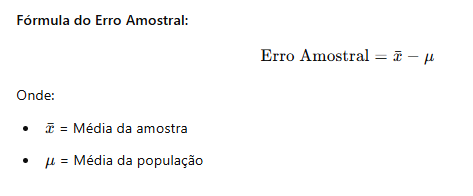

O TLC nos diz que a média das médias amostrais tende a se aproximar da média da população, mas isso não significa que cada amostra individual terá a mesma média que a população.

O erro amostral pode ser positivo ou negativo, dependendo se a média da amostra é maior ou menor que a média populacional.

In [ ]:
import numpy as np
import pandas as pd

# Geração da população original
population = np.random.randint(0, 33, size=10**7)
pop_mean = np.mean(population)
pop_std = np.std(population)

In [ ]:
# Tirando uma amostra da população
n = 5
sample = np.random.choice(population, size=n, replace=False) ##Aqui estamos pegando uma amostra de tamanho n=5 da população origina
sample_mean = np.mean(sample) #Calculamos a média da amostra.

# Calculando o erro amostral
erro_amostral = sample_mean - pop_mean #O erro amostral é a diferença entre a média da amostra e a média da população.

print(f"Média Populacional: {pop_mean:.2f}")
print(f"Média Amostral: {sample_mean:.2f}")
print(f"Erro Amostral: {erro_amostral:.2f}")

Média Populacional: 16.00
Média Amostral: 25.60
Erro Amostral: 9.60


Erro Amostral: É a diferença entre a média da amostra e a média populacional.

* Se o erro amostral for positivo, significa que a média da amostra foi maior que a média populacional.

* Se for negativo, significa que a média da amostra foi menor que a média populacional.
